### Student Information
Name:黃梓寧

Student ID:109061648

GitHub ID:duncan1315

Kaggle name:Huang Duncan

Kaggle private scoreboard snapshot:

![Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2020-Lab2-Master Repo](https://github.com/fhcalderon87/DM2020-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/c/dm2020-hw2-nthu/) regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the score (ie. 20% of 30% )

    - **Top 41% - 100%**: Get (101-x)% of the score, where x is your ranking in the leaderboard (ie. (101-x)% of 30% )   
    Submit your last submission __BEFORE the deadline (Dec. 5th 11:59 pm, Saturday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2020-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb), but make sure to fork the [DM2020-Lab2-Homework](https://github.com/fhcalderon87/DM2020-Lab2-Homework) repository this time! Also please __DON´T UPLOAD HUGE DOCUMENTS__, please use Git ignore for that.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 8th 11:59 pm, Tuesday)__. 

In [1]:
### Begin Assignment Here

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer 
import nltk
import seaborn as sns
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.offsetbox import OffsetImage, AnnotationBbox, TextArea
import plotly.graph_objects as go
from pandas.core.frame import DataFrame
import plotly.express as px
import math
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
import pandas as pd
import keras
from sklearn.metrics import accuracy_score
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax
from gensim.models import KeyedVectors
import gensim.downloader as api
import ssl
import urllib.request
from sklearn.manifold import TSNE


### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Using TensorFlow backend.
Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


Training set

In [3]:
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(train_df.text)

term_frequencies = []
for j in range(0,X_counts.shape[1]):  
    term_frequencies.append(sum(X_counts[:,j].toarray()))

    
t_f = {'term':count_vect.get_feature_names(),'freq':term_frequencies}
t_f = pd.DataFrame(t_f,index=[i for i in range(0, len(term_frequencies))])
t_f['freq'] = t_f['freq'].astype('int')
t_f=t_f.sort_values(by='freq',ascending=False)
t_f[:30]

,term,freq
8930,the,1736
9119,to,1289
537,and,955
10051,you,796
6371,of,793
4546,is,787
4571,it,717
4383,in,626
8924,that,537
5957,my,535


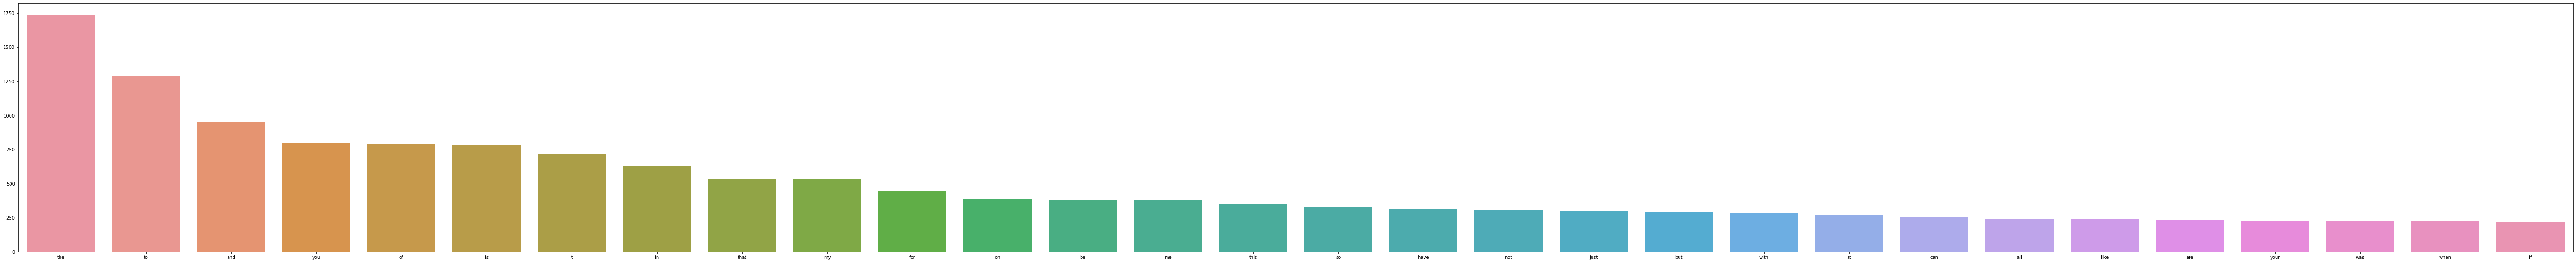

In [4]:
#Transform df into two list
term = t_f['term'].tolist()
freq = t_f['freq'].tolist()

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=term[:30], 
            y=freq[:30])

testing set

In [5]:
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(test_df.text)

term_frequencies = []
for j in range(0,X_counts.shape[1]):  
    term_frequencies.append(sum(X_counts[:,j].toarray()))

    
t_f = {'term':count_vect.get_feature_names(),'freq':term_frequencies}
t_f = pd.DataFrame(t_f,index=[i for i in range(0, len(term_frequencies))])
t_f['freq'] = t_f['freq'].astype('int')
t_f=t_f.sort_values(by='freq',ascending=False)
t_f[0:30]

,term,freq
1687,the,153
1739,to,138
99,and,92
1240,of,83
909,it,83
1938,you,82
903,is,77
867,in,69
655,for,57
1686,that,55


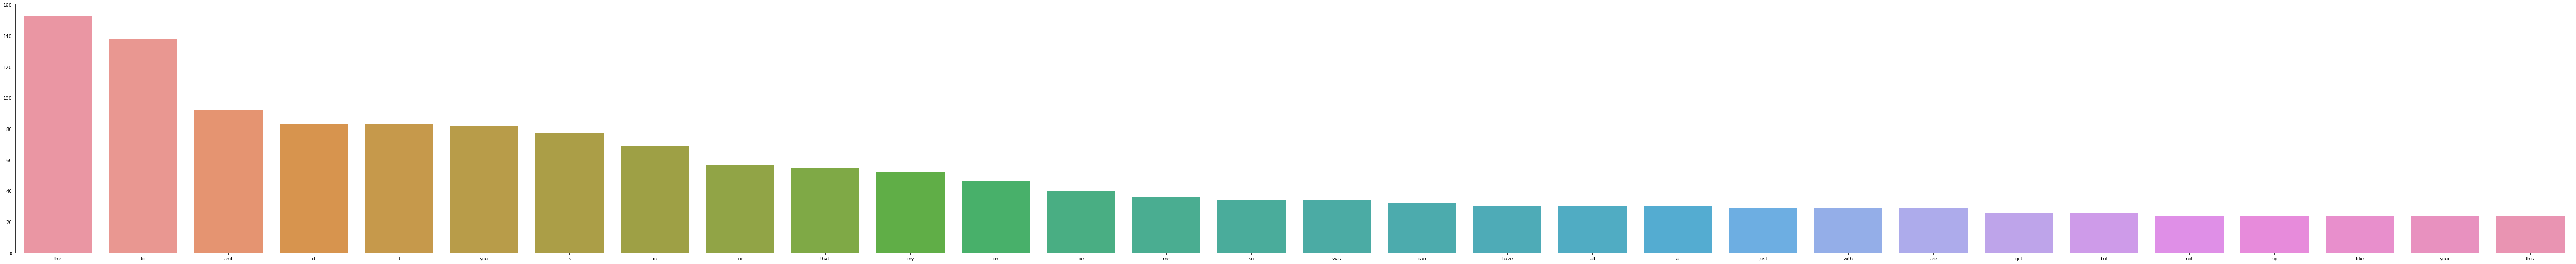

In [6]:
#Transform df into two list
term = t_f['term'].tolist()
freq = t_f['freq'].tolist()

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=term[:30], 
            y=freq[:30])

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [7]:
# Answer here
document_text=[]
for i in range(0,len(train_df['text'])):
    document_text.append(train_df['text'][i])

count_vect=CountVectorizer()
transformer = TfidfTransformer()

tfidf = transformer.fit_transform(count_vect.fit_transform(document_text))

#feature names for features [100:110]
count_vect.get_feature_names()[100:110]

['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s', '31']

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

# Answer here 
Confusion matrix shows the prediction result of all the classes.
For example, the diagonal line(55, 70, 54, 42) are the correct predictions 
because true labels and prediction labels and the same.
In the upper left coner, there are 4 "sadness" been mistaken as "anger" so it denote 4.


---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [8]:
# Answer here
from sklearn.naive_bayes import MultinomialNB

wf_train_data = count_vect.fit_transform(train_df['text'])
wf_test_data = count_vect.transform(test_df['text'])


model = MultinomialNB(alpha=1.0)
model.fit(wf_train_data,train_df['emotion'])

print('Train Accuracy:',model.score(wf_train_data,train_df['emotion']))
print('Test Accuracy:',model.score(wf_test_data,test_df['emotion']))

Train Accuracy: 0.972875726543039
Test Accuracy: 0.7723342939481268


---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

# Answer here 
Decision tree is overfitting because it perform well in training data but got poor accuracy in testing data.
Overfit happened because decision tree will grow a lot of nodes then solve training set perfectly, 
and we can solve this problem by 'Random Forest'.


---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below (Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

In [9]:
# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

(3613, 500)

In [10]:
# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [11]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)



check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 1664       fear
2881    sadness
55        anger
2775        joy
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


In [12]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


In [13]:
# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 500)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                32064     
_________________________________________________________________
re_lu_1 (ReLU)               (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
re_lu_2 (ReLU)               (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 260       
____________________________________________

In [14]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')


Train on 3613 samples, validate on 347 samples
Epoch 1/25
3613/3613 [==============================] - 1s 229us/step - loss: 1.3366 - accuracy: 0.3568 - val_loss: 1.2770 - val_accuracy: 0.4611
Epoch 2/25
3613/3613 [==============================] - 0s 53us/step - loss: 1.0021 - accuracy: 0.6449 - val_loss: 0.9218 - val_accuracy: 0.6599
Epoch 3/25
3613/3613 [==============================] - 0s 51us/step - loss: 0.5958 - accuracy: 0.7877 - val_loss: 0.7900 - val_accuracy: 0.7118
Epoch 4/25
3613/3613 [==============================] - 0s 50us/step - loss: 0.4278 - accuracy: 0.8422 - val_loss: 0.7590 - val_accuracy: 0.6916
Epoch 5/25
3613/3613 [==============================] - 0s 50us/step - loss: 0.3439 - accuracy: 0.8810 - val_loss: 0.8251 - val_accuracy: 0.7003
Epoch 6/25
3613/3613 [==============================] - 0s 50us/step - loss: 0.2780 - accuracy: 0.9067 - val_loss: 0.8333 - val_accuracy: 0.6945
Epoch 7/25
3613/3613 [==============================] - 0s 50us/step - loss: 0.24

In [15]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result = label_decode(label_encoder, pred_result)

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

testing accuracy: 0.66
/home/ahg/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

/home/ahg/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.356767,1.336561,0.461095,1.276997
1,1,0.644893,1.002072,0.659942,0.921803
2,2,0.787711,0.595767,0.711816,0.790040
3,3,0.842236,0.427772,0.691643,0.759038
4,4,0.880985,0.343854,0.700288,0.825118
5,5,0.906726,0.278044,0.694524,0.833260
6,6,0.921118,0.243583,0.674352,0.861794
7,7,0.931082,0.202142,0.688761,0.929796
8,8,0.945751,0.174634,0.671470,0.999676
9,9,0.955716,0.155043,0.688761,1.048072


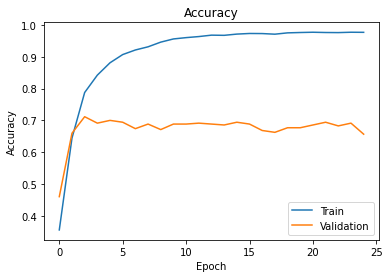

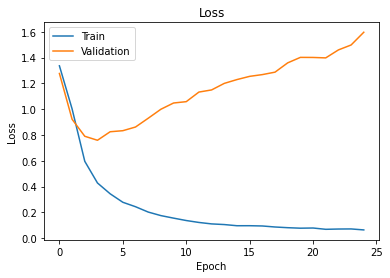

In [16]:
training_log = pd.read_csv("logs/training_log.csv")

#Accuracy
plt_loss = plt.plot(training_log.accuracy)
plt_accuracy = plt.plot(training_log.val_accuracy)
plt.legend(['Train', 'Validation'])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title('Accuracy')
plt.show()

#Loss
plt_loss = plt.plot(training_log.loss)
plt_accuracy = plt.plot(training_log.val_loss)
plt.legend(['Train', 'Validation'])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title('Loss')
plt.show()

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


# Answer here 
We can train a RNN model by matching the input size to the dimension of word vectors, so that we can put in word vectors like a sentence and train the model.

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [17]:
# Answer here

model_path = "GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
glove_twitter_25_model.most_similar('happy', topn=10)

[('birthday', 0.9577817916870117),
 ('thank', 0.9376667141914368),
 ('welcome', 0.9336150288581848),
 ('love', 0.9176183938980103),
 ('miss', 0.916450023651123),
 ('hello', 0.9158351421356201),
 ('thanks', 0.9150084257125854),
 ('merry', 0.9053248763084412),
 ('bless', 0.9027323126792908),
 ('wish', 0.9013165831565857)]

In [18]:
## w2v model
%matplotlib inline
model = w2v_google_model

topn = 15
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]  

#target_words
target_words = happy_words + angry_words + sad_words + fear_words

#color list
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn

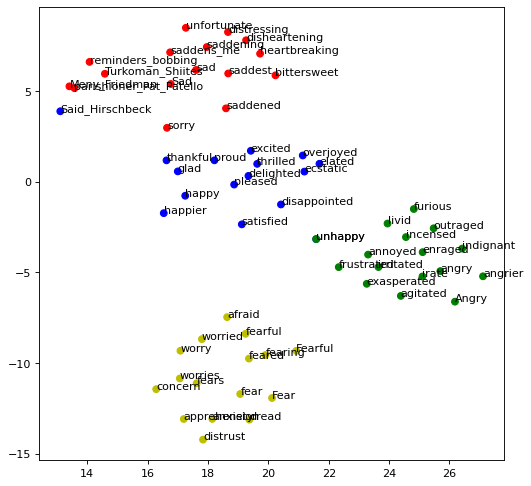

In [24]:
%matplotlib inline
#model = w2v_google_model

## prepare training word vectors
#size = 200
#target_size = len(target_words)
all_word = list(model.vocab.keys())
word_train = target_words + all_word[:200]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=24)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=80)
plt.scatter(X_tsne[:len(target_words), 0], X_tsne[:len(target_words), 1], c=color)
for label, x, y in zip(target_words, X_tsne[:len(target_words), 0], X_tsne[:len(target_words), 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

# Kaggle report

In [ ]:
 Preprocessing the training data to csv file with column text and emotion only and transform the label to one-hot label

Choose Bidirectional RNN  as my model, and below are hyperparameters.  
  
input_size = 100  
hidden_size = 128  
num_layers = 2  
num_classes = 8  
batch_size = 256  
num_epochs = 15  
learning_rate = 0.001

In [ ]:
class BiRNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(BiRNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, 
                            batch_first=True, bidirectional=True)
        self.fc = nn.Linear(hidden_size*2, num_classes)  
    
    def forward(self, x):
   
        h0 = Variable(torch.zeros(self.num_layers*2, x.size(0), self.hidden_size)).cuda() 
        c0 = Variable(torch.zeros(self.num_layers*2, x.size(0), self.hidden_size)).cuda()
        
        out, _ = self.lstm(x, (h0, c0))
        
        out = self.fc(out[:, -1, :])
        return out